Using cache found in C:\Users\MaxF�rsntr�m-AI23GBG/.cache\torch\hub\ultralytics_yolov5_master


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\MaxFrsntrm-AI23GBG\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  8.8s, installed 1 package: ['gitpython>=3.1.30']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2025-1-21 Python-3.12.6 torch-2.5.1+cpu CPU

100%|██████████| 14.1M/14.1M [00:01<00:00, 14.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\MaxF�rsntr�m-AI23GBG/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 3508x4961 (no detections)
Speed: 1128.0ms pre-process, 900.0ms inference, 27.0ms NMS per image at shape (1, 3, 480, 640)


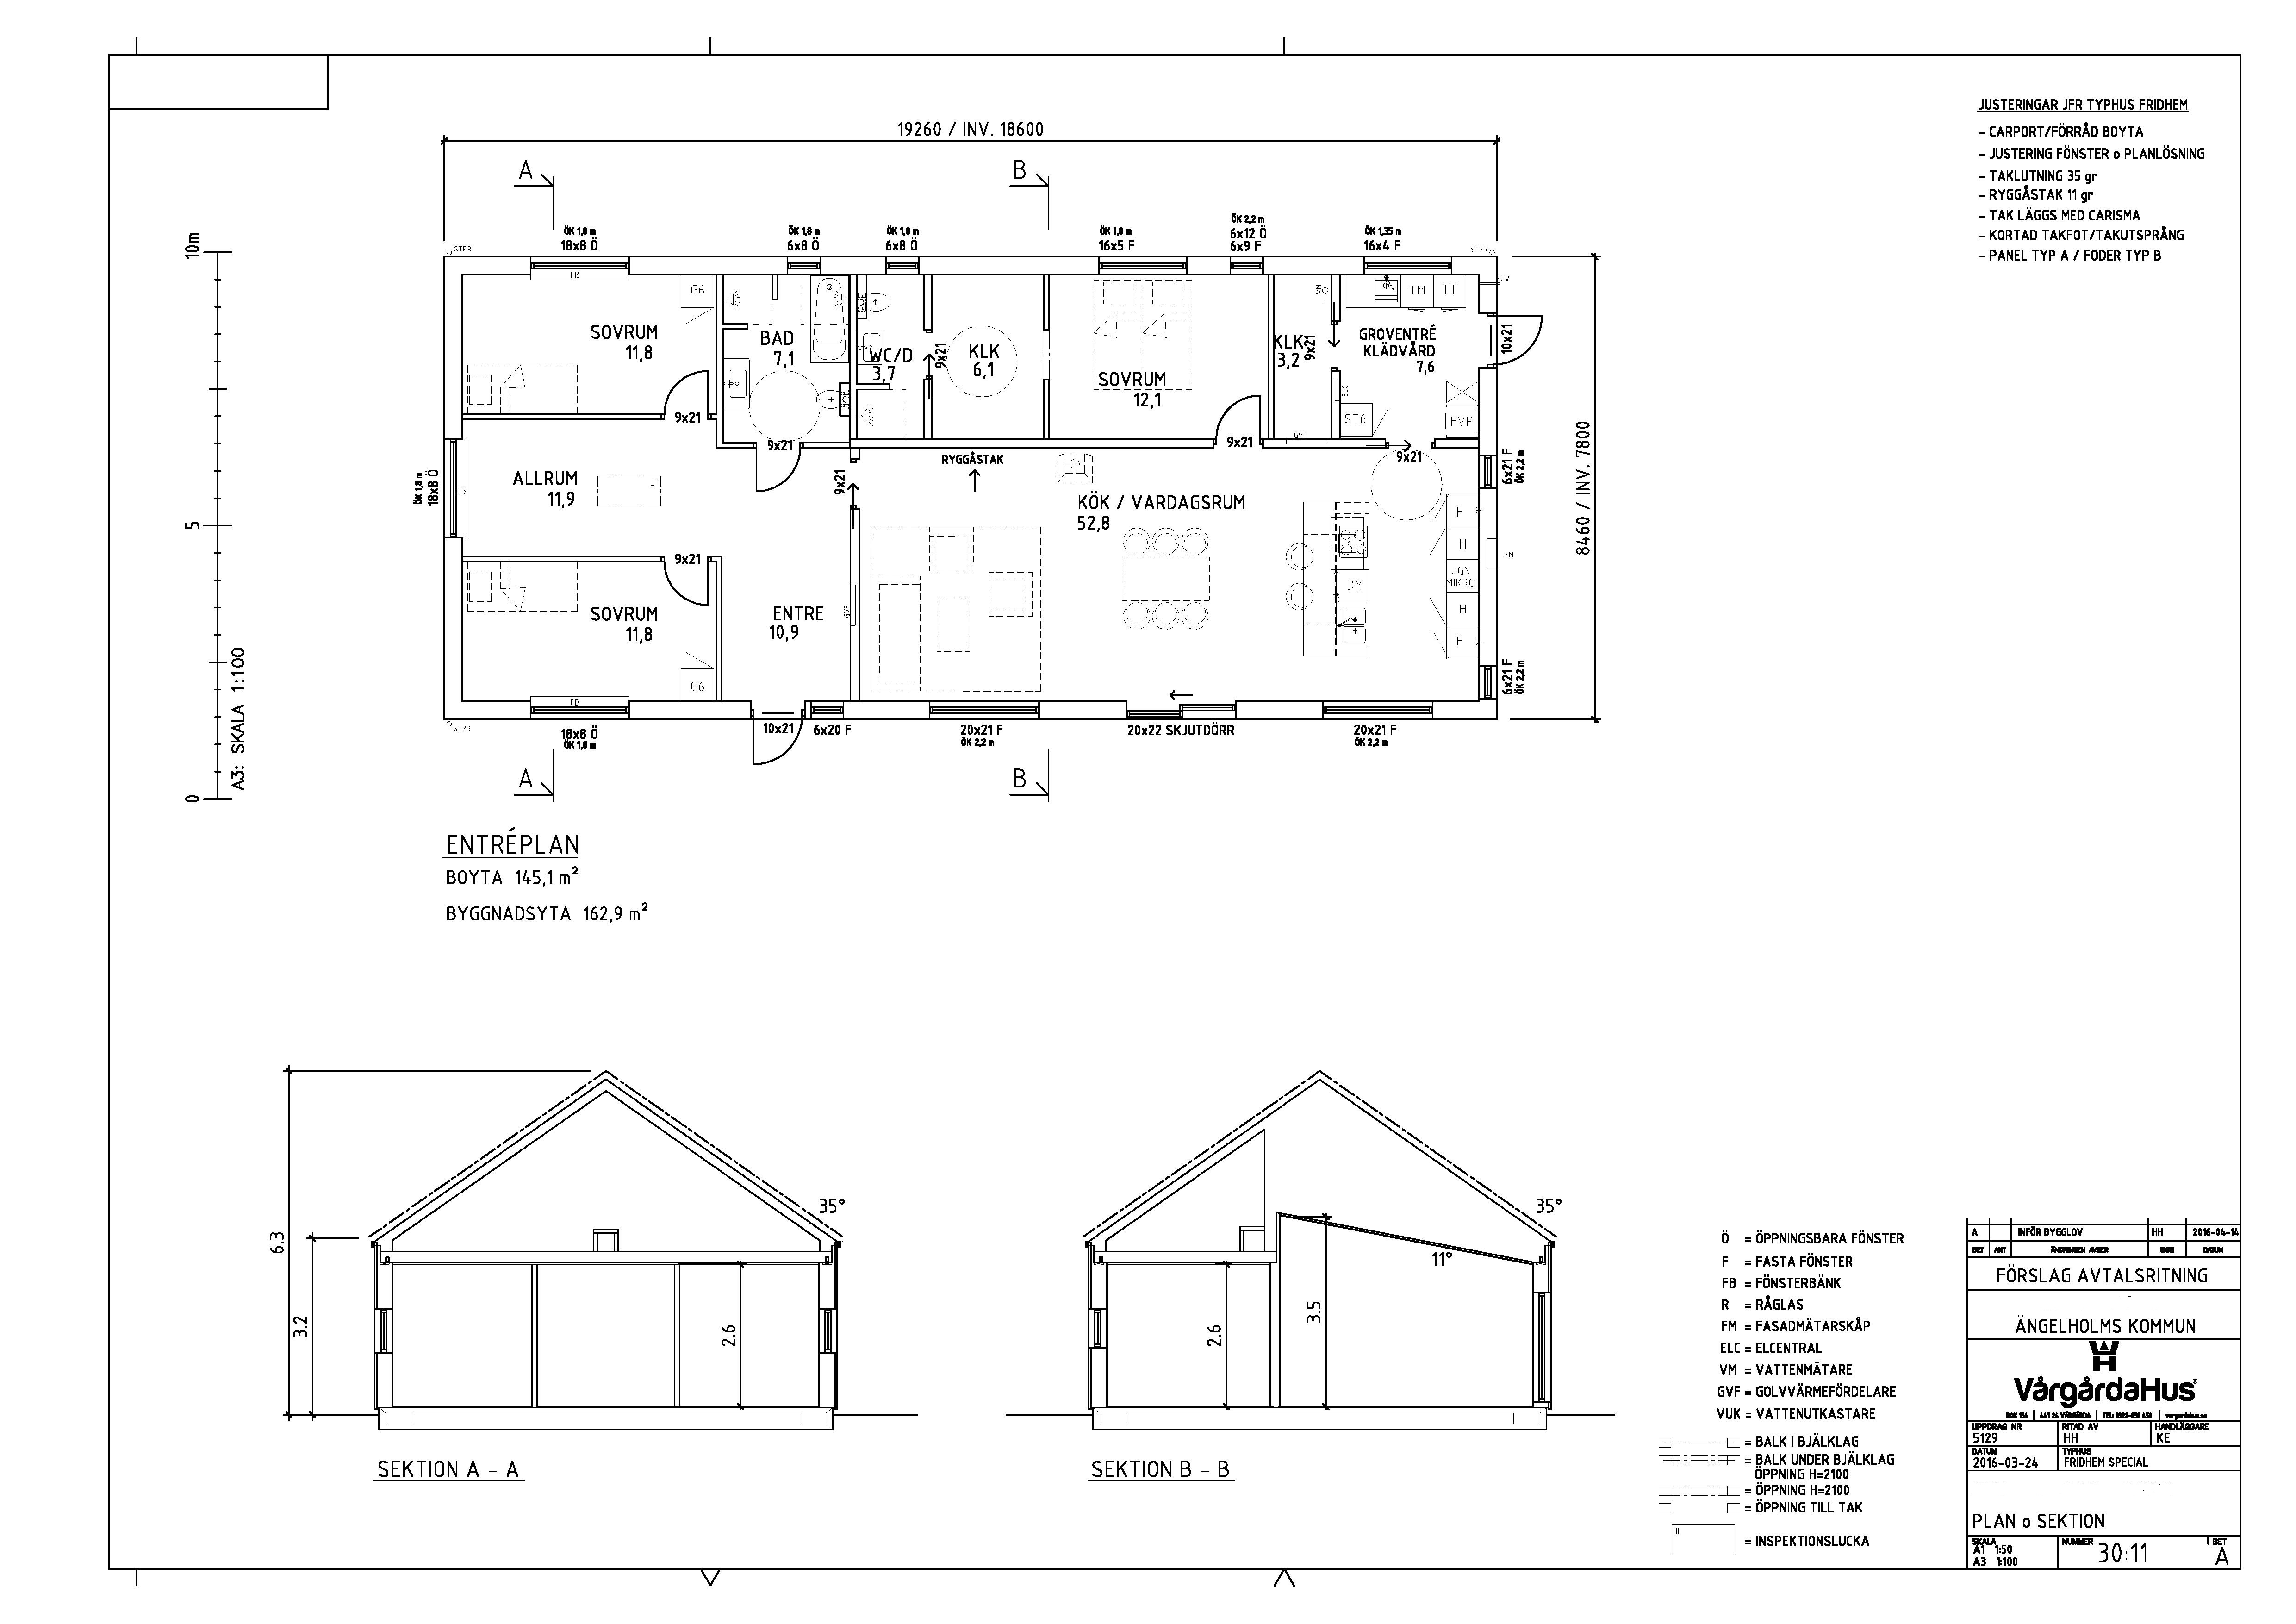

Saved 1 image to runs\detect\exp


In [3]:
import torch
import cv2

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

img_path = "images/R.jpg"

#img_resize = 

results = model(img_path)

results.print()
results.show()
results.save()



In [5]:
# masking an image
from PIL import Image, ImageDraw

image = Image.open("Images/R.jpg")

mask = Image.new("L", image.size, 0)
draw = ImageDraw.Draw(mask)

draw.rectangle([50, 50, 200, 200], fill=255)

masked_image = Image.composite(image, Image.new("RGB", image.size, (0,0,0)), mask)

masked_image.show()
masked_image.save("masked_image.jpg")

In [17]:
import matplotlib.pyplot as plt
from torchvision.io import read_image

image = read_image("Images/R.jpg")
mask = read_image("Images/masked_image.jpg")

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Image")
plt.imshow(image.permute(1, 2, 0))
plt.subplot(122)
plt.title("Mask")
plt.imshow(mask.permute(1, 2, 0))

In [18]:
import torch
import torchvision

# loading a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [19]:
from PIL import Image
import torchvision.transforms as T

image_path = 'Images/R.jpg'
image = Image.open(image_path).convert("RGB")

transform = T.Compose([
    T.ToTensor(), # Converting the image to a tensor
])

image_tensor = transform(image)

In [20]:
# Batch dimension
image_tensor = image_tensor.unsqueeze(0)

# Object detection
with torch.no_grad():
    predictions = model(image_tensor)

In [23]:
# Visualizing results
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Extracting the bounding boxes and labels
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# threshold to filter out low-confidence detections
threshold = 0.5

fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Bouncing boxes
for box, label, score in zip(boxes, labels, scores):
    if score > threshold:
        # drawing bounding box
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0],
                                 box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        # adding label
        ax.text(box[0], box[1], f'{label.item()}: {score:.2f}',
                bbox=dict(facecolor='yellow', alpha=0.5))
        
        plt.show()


